# **COMP1016 Group Project Part A**

## **Question 1**

### Parts A & B

In [44]:
import pandas as pd

results = pd.read_csv('results.csv')

teams = ['England', 'Wales', 'Indonesia', 'Japan', 'Poland']
years = list(map(str, range(2012, 2022)))

table1a = pd.DataFrame(columns=['Team', 'Winning Percentage'])
table1b = pd.DataFrame(columns=['Team', 'Year', 'Winning Percentage'])

for n in teams:
    for i in years:
        results[i] = [i in date for date in results['date']]
        results1 = results[results[i]].copy()

        # Identify matches where the team played as the away team
        results1['away'] = [n in away_team for away_team in results1['away_team']]
        awayWins = 0

        # Count wins when the team was the away team
        for index, row in results1.iterrows():
            if row['away'] and row['away_team'] == n and row['away_score'] > row['home_score']:
                awayWins += 1

        # Identify matches where the team played as the home team
        results1['home'] = [n in home_team for home_team in results1['home_team']]
        homeWins = 0

        # Count wins when the team was the home team
        for index, row in results1.iterrows():
            if row['home'] and row['home_team'] == n and row['home_score'] > row['away_score']:
                homeWins += 1

        # Identify matches where the team participated (either home or away)
        results1[n] = results1['away'] | results1['home']
        jointTeams = results1[results1[n]]

        # Calculate total wins and winning percentage
        totalWins = homeWins + awayWins
        if len(jointTeams) != 0:
            winRate = totalWins / len(jointTeams) * 100
        else:
            winRate = 0

        newRow = {'Team': n, 'Year': i, 'Winning Percentage': winRate}
        table1b = pd.concat([table1b, pd.DataFrame([newRow])], ignore_index=True)

# Calculate the average winning percentage for each team
table1a = table1b.groupby('Team', as_index=False)['Winning Percentage'].mean()
table1a

<ipython-input-44-2f506361c367>:46: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  table1b = pd.concat([table1b, pd.DataFrame([newRow])], ignore_index=True)


,Team,Winning Percentage
0,England,61.279837
1,Indonesia,31.862859
2,Japan,54.283223
3,Poland,50.911783
4,Wales,42.405678


### Part C

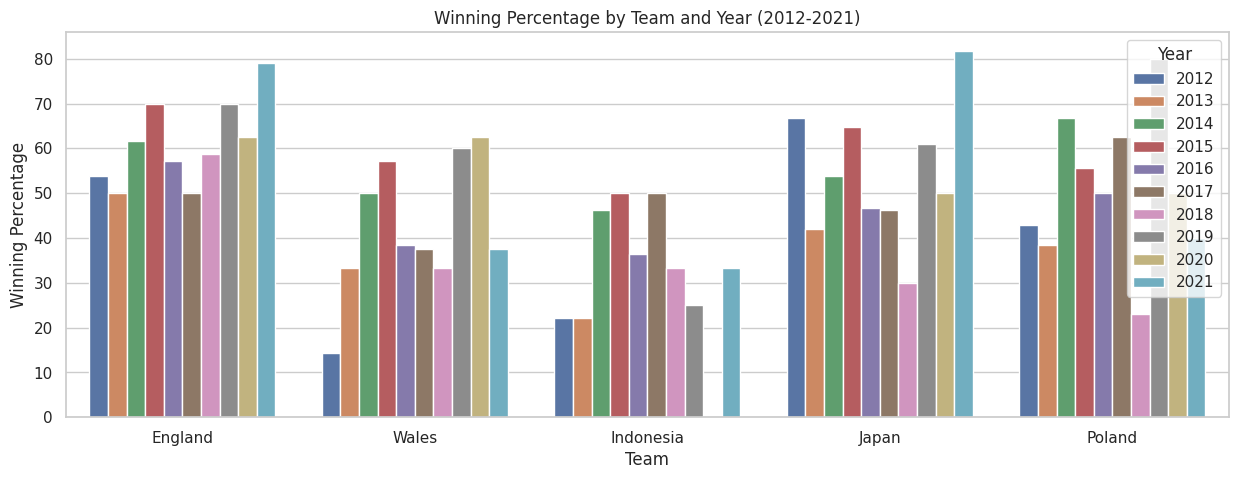

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
sns.barplot(data=table1b, x ='Team', y = 'Winning Percentage', hue= 'Year')
plt.title('Winning Percentage by Team and Year (2012-2021)')
plt.show()

### Part D

#### For all 5 teams, the winning percentage varies significantly each year. However, England has the highest average winning percentage amongst all 5 teams with the least variation in percentages. On the other hand, Indonesia has the lowest average winning percentage amongst all 5 teams. Poland and Japan have greater variations in their winning percentages.

## **Question 2**

### Part A

In [ ]:
import pandas as pd

results = pd.read_csv('results.csv')

teams = ['England', 'Wales', 'Indonesia', 'Japan', 'Poland']
years = list(map(str, range(2012, 2022)))

table2a = pd.DataFrame(columns=['Team', 'Average Goals Conceded'])
table2b = pd.DataFrame(columns=['Team', 'Year', 'Average Goals Conceded'])

for n in teams:
    for i in years:
        results[i] = [i in date for date in results['date']]
        results1 = results[results[i]].copy()

        # Identify matches where the team played as the away team
        results1['away'] = [n in away_team for away_team in results1['away_team']]
        awayGoalsConceded = results1.loc[results1['away'] & (results1['away_team'] == n), 'home_score'].sum()

        # Identify matches where the team played as the home team
        results1['home'] = [n in home_team for home_team in results1['home_team']]
        homeGoalsConceded = results1.loc[results1['home'] & (results1['home_team'] == n), 'away_score'].sum()

        # Identify matches where the team participated (either home or away)
        results1[n] = results1['away'] | results1['home']
        totalMatches = results1[n].sum()

        # Calculate total goals conceded and average per match
        totalGoalsConceded = homeGoalsConceded + awayGoalsConceded
        if totalMatches != 0:
            avgGoalsConceded = totalGoalsConceded / totalMatches
        else:
            avgGoalsConceded = 0

        newRow = {'Team': n, 'Year': i, 'Average Goals Conceded': avgGoalsConceded}
        table2b = pd.concat([table2b, pd.DataFrame([newRow])], ignore_index=True)

# Create a summary table with average goals conceded per year
summary_table = table2b.pivot(index='Team', columns='Year', values='Average Goals Conceded').reset_index()

# Calculate the overall average goals conceded per team
table2a = table2b.groupby('Team', as_index=False)['Average Goals Conceded'].mean()

# Merge the summary and overall tables
combined_table = pd.merge(summary_table, table2a, on='Team', how='left')

print("Summary Table: Average Goals Conceded Per Match by Team In Each Year")
combined_table

<ipython-input-46-0b715d6d64df>:37: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  table2b = pd.concat([table2b, pd.DataFrame([newRow])], ignore_index=True)


Summary Table: Average Goals Conceded Per Match by Team In Each Year


,Team,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Average Goals Conceded
0,England,1.000000,0.916667,0.615385,0.500000,0.857143,0.700000,0.882353,0.900000,0.500,0.263158,0.713470
1,Indonesia,2.000000,1.666667,1.000000,1.000000,1.636364,0.875000,1.888889,2.500000,0.000,2.222222,1.478914
2,Japan,0.750000,1.736842,1.615385,0.411765,0.600000,1.230769,1.000000,0.913043,0.500,0.454545,0.921235
3,Poland,0.785714,1.230769,0.444444,1.222222,0.714286,1.250000,1.384615,0.500000,0.875,1.333333,0.974038
4,Wales,2.285714,1.222222,0.833333,0.714286,1.153846,0.625000,1.222222,0.600000,0.500,1.125000,1.028162


### Part B

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

winning_percentage = table1b # From the first task
average_goals_conceded = table2b # From the second task

# Merge both datasets on 'Team' and 'Year'
analysis_df = pd.merge(winning_percentage, average_goals_conceded, on=['Team', 'Year'], how='inner')

# Initialize a list to store correlation results
correlation_results = []

# Calculate Pearson correlation coefficient for each team
for n in analysis_df['Team'].unique():
    team_data = analysis_df[analysis_df['Team'] == n]
    if team_data.shape[0] > 1:  # Ensure there are at least two data points
        corr, p_val = pearsonr(team_data['Average Goals Conceded'], team_data['Winning Percentage'])
        new_row = {'Team': n, 'Correlation Coefficient': round(corr, 2), 'P-Value': round(p_val, 4)}
        correlation_results.append(new_row)
    else:
        new_row = {'Team': n, 'Correlation Coefficient': None, 'P-Value': None}
        correlation_results.append(new_row)

correlation_results = pd.DataFrame(correlation_results)
correlation_results

,Team,Correlation Coefficient,P-Value
0,England,-0.68,0.0302
1,Wales,-0.89,0.0006
2,Indonesia,0.09,0.8087
3,Japan,-0.49,0.1518
4,Poland,-0.67,0.0340


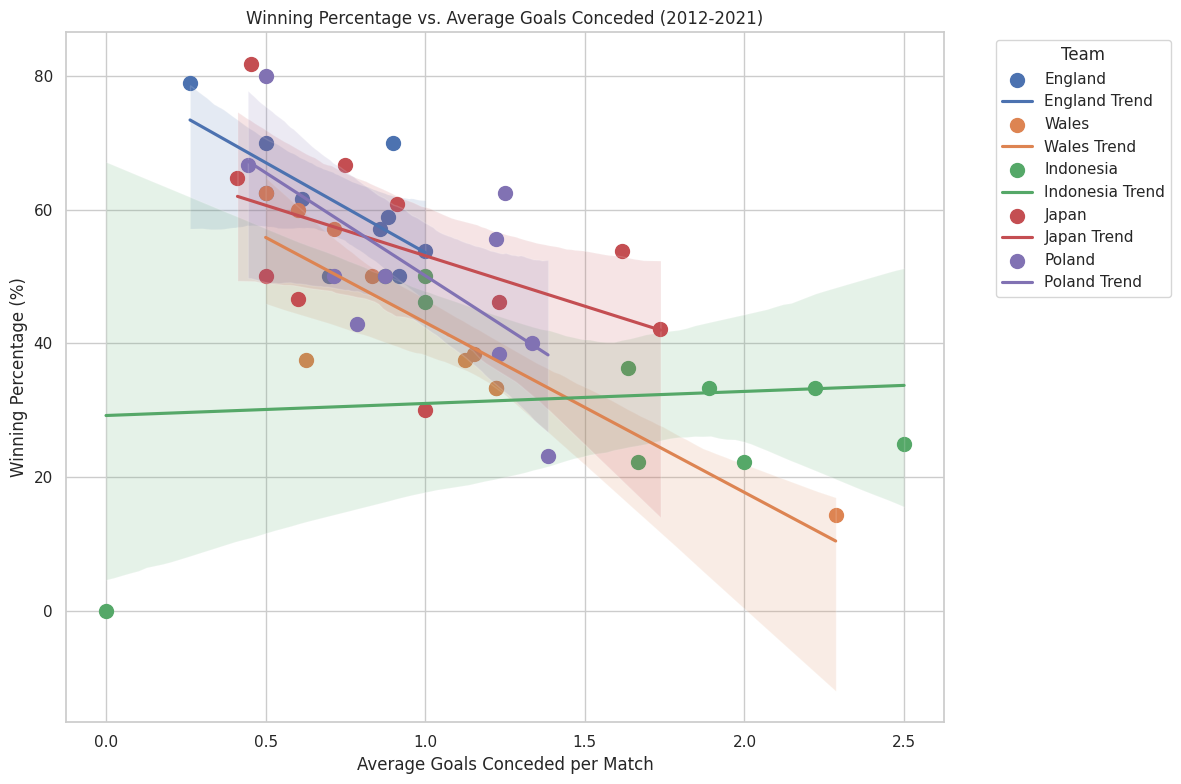

In [47]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Scatter plot with regression trend line for each team
for n in analysis_df['Team'].unique():
    team_data = analysis_df[analysis_df['Team'] == n]
    plt.scatter(team_data['Average Goals Conceded'], team_data['Winning Percentage'], label=n, s=100)
    if team_data.shape[0] > 1:
        sns.regplot(x=team_data['Average Goals Conceded'], y=team_data['Winning Percentage'], scatter=False, label=f"{n} Trend")

plt.title('Winning Percentage vs. Average Goals Conceded (2012-2021)')
plt.xlabel('Average Goals Conceded per Match')
plt.ylabel('Winning Percentage (%)')
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Part C

#### In the correlation test between five teams’ average goals conceded and their winning percentage, three patterns  appeared. England, Wales, and Poland manifested a strong negative correlation: Higher goals conceded were equal to lower  winning percentages. Their correlation coefficients were also close to -1 (England: -0.68,  Wales: -0.89, Poland: -0.67), with p-values less than  0.05, that are statistically significant and that suggest that a better defense increases the chances of  winning. Japan had a moderate negative correlation (-0.49), but the p-value was high  (0.1518), without statistical significance. Indonesia had a very weak positive correlation (0.09),  with a high p-value of 0.8087, which means that there is no correlation at  all.

## **Question 3**

### Parts A–C

In [48]:
import pandas as pd

df = pd.read_csv('results.csv')

selected_teams = ['England', 'Indonesia', 'Poland', 'Japan', 'Wales']
filtered_df = df[(df['home_team'].isin(selected_teams)) | (df['away_team'].isin(selected_teams))]

# Function to calculate winning probabilities
def calculate_winning_probabilities(team, df):
    team_matches = df[(df['home_team'] == team) | (df['away_team'] == team)]
    team_matches = team_matches.sort_values('date').reset_index(drop=True)

    win_win = 0
    win_lose = 0
    lose_lose = 0
    total_win_win = 0
    total_win_lose = 0
    total_lose_lose = 0

    for i in range(2, len(team_matches)):
        previous_two_results = []
        for j in range(i-2, i):
            if (team_matches.iloc[j]['home_team'] == team and team_matches.iloc[j]['home_score'] > team_matches.iloc[j]['away_score']) or \
               (team_matches.iloc[j]['away_team'] == team and team_matches.iloc[j]['away_score'] > team_matches.iloc[j]['home_score']):
                previous_two_results.append('win')
            else:
                previous_two_results.append('lose')

        current_result = 'win' if (team_matches.iloc[i]['home_team'] == team and team_matches.iloc[i]['home_score'] > team_matches.iloc[i]['away_score']) or \
                                 (team_matches.iloc[i]['away_team'] == team and team_matches.iloc[i]['away_score'] > team_matches.iloc[i]['home_score']) else 'lose'

        if previous_two_results == ['win', 'win']:
            total_win_win += 1
            if current_result == 'win':
                win_win += 1
        elif 'win' in previous_two_results:
            total_win_lose += 1
            if current_result == 'win':
                win_lose += 1
        elif previous_two_results == ['lose', 'lose']:
            total_lose_lose += 1
            if current_result == 'win':
                lose_lose += 1

    # Calculate probabilities
    prob_win_win = win_win / total_win_win if total_win_win > 0 else 0
    prob_win_lose = win_lose / total_win_lose if total_win_lose > 0 else 0
    prob_lose_lose = lose_lose / total_lose_lose if total_lose_lose > 0 else 0

    return prob_win_win, prob_win_lose, prob_lose_lose

# Calculate probabilities for each team
results = {}
for team in selected_teams:
    prob_win_win, prob_win_lose, prob_lose_lose = calculate_winning_probabilities(team, filtered_df)
    results[team] = {'Win-Win': prob_win_win,
                     'Win-Lose': prob_win_lose,
                     'Lose-Lose': prob_lose_lose}

# Calculate overall probabilities
overall_win_win = sum([results[team]['Win-Win'] for team in selected_teams]) / len(selected_teams)
overall_win_lose = sum([results[team]['Win-Lose'] for team in selected_teams]) / len(selected_teams)
overall_lose_lose = sum([results[team]['Lose-Lose'] for team in selected_teams]) / len(selected_teams)

for team in selected_teams:
    print(f"{team}:")
    print(f"  Win-Win: {results[team]['Win-Win']:.2f}")
    print(f"  Win-Lose: {results[team]['Win-Lose']:.2f}")
    print(f"  Lose-Lose: {results[team]['Lose-Lose']:.2f}")
    print()

print("Overall:")
print(f"  Win-Win: {overall_win_win:.2f}")
print(f"  Win-Lose: {overall_win_lose:.2f}")
print(f"  Lose-Lose: {overall_lose_lose:.2f}")

England:
  Win-Win: 0.62
  Win-Lose: 0.56
  Lose-Lose: 0.50

Indonesia:
  Win-Win: 0.30
  Win-Lose: 0.37
  Lose-Lose: 0.42

Poland:
  Win-Win: 0.45
  Win-Lose: 0.45
  Lose-Lose: 0.39

Japan:
  Win-Win: 0.50
  Win-Lose: 0.48
  Lose-Lose: 0.46

Wales:
  Win-Win: 0.34
  Win-Lose: 0.32
  Lose-Lose: 0.31

Overall:
  Win-Win: 0.44
  Win-Lose: 0.44
  Lose-Lose: 0.42


### Part D

#### Win-Win Condition: Teams that won their previous two matches have a higher probability of winning the next match. This suggests that winning streaks can positively influence a team's performance.

#### Win-Lose Condition: Teams that won one of their previous two matches have a moderate probability of winning the next match. This indicates that recent performance can still have a positive impact, but not as strongly as a winning streak.

#### Lose-Lose Condition: Teams that lost their previous two matches have a lower probability of winning the next match. This suggests that losing streaks can negatively affect a team's performance.

#### Conclusion: Winning trends do exist in football matches. Teams that are on a winning streak are more likely to continue winning, while teams on a losing streak are more likely to continue losing. This could be due to factors such as team morale, confidence, and momentum. However, the impact of recent performance is not absolute, as teams can still win or lose regardless of their recent results.


## **Question 4**

In [49]:
import pandas as pd
from fredapi import Fred
import matplotlib.pyplot as plt

fred = Fred(api_key='5c732abc2ea104b733b6edc3439d895f')

# Extract data using fred
df_property = fred.get_series('QCNR628BIS') # China Residential Property Prices
df_indicator_1 = fred.get_series('DGS10') # 10-Year Treasury Yield (proxy for interest rates)
df_indicator_2 = fred.get_series('CHNGDPNQDSMEI') # China GDP Growth Rate

df = pd.DataFrame({
    'Property Price Index': df_property,
    'Interest Rate': df_indicator_1,
    'GDP Growth': df_indicator_2
})

df.dropna(inplace=True)

### Interest Rates and Property Prices

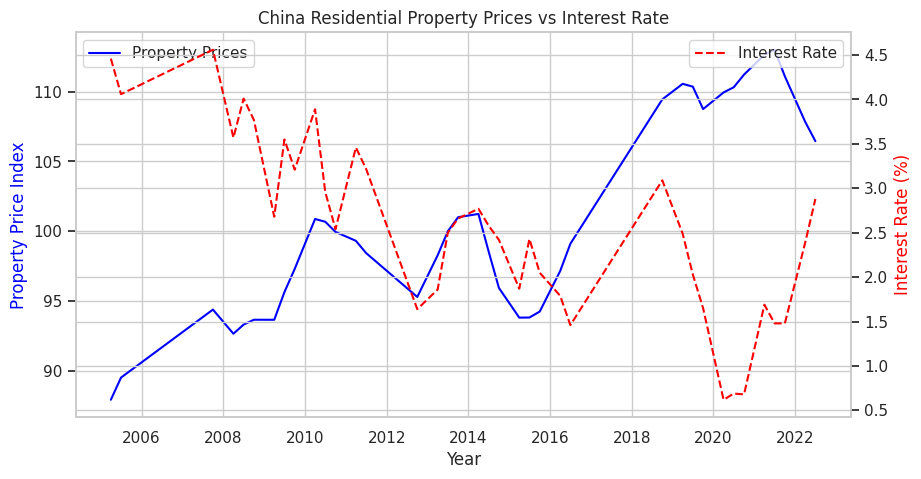

In [50]:
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.set_title('China Residential Property Prices vs Interest Rate')
ax1.set_xlabel('Year')
ax1.set_ylabel('Property Price Index', color='blue')
ax1.plot(df.index, df['Property Price Index'], color='blue', label='Property Prices')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.set_ylabel('Interest Rate (%)', color='red')
ax2.plot(df.index, df['Interest Rate'], color='red', linestyle='dashed', label='Interest Rate')
ax2.legend(loc='upper right')
plt.show()

### GDP Growth and Property Prices

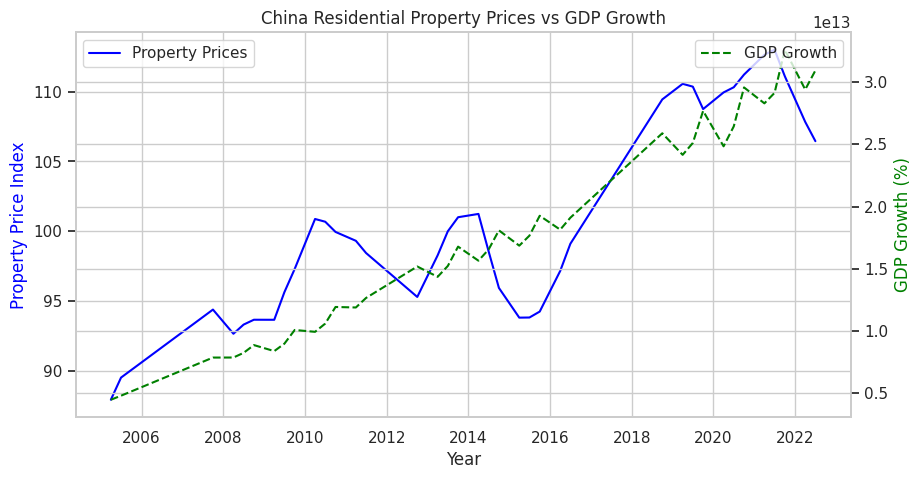

In [51]:
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.set_title('China Residential Property Prices vs GDP Growth')
ax1.set_xlabel('Year')
ax1.set_ylabel('Property Price Index', color='blue')
ax1.plot(df.index, df['Property Price Index'], color='blue', label='Property Prices')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.set_ylabel('GDP Growth (%)', color='green')
ax2.plot(df.index, df['GDP Growth'], color='green', linestyle='dashed', label='GDP Growth')
ax2.legend(loc='upper right')
plt.show()